# 1. Load and Explore Dataset

Import the pandas, numpy and altair packages

In [1]:
# Solution
import pandas as pd
import numpy as np
import altair as alt

Mounting the drive
In this notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read data from CSV file.

In [17]:
data = pd.read_csv('/content/drive/My Drive/iLab/pd_speech_features.csv')

# 2. Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


# 3. Data cleaning

##Drop duplicated records
Found duplicated data 1702 records

In [18]:
# Check for duplicated values and display the count
duplicate_count = data.duplicated().sum()

# Print the number of duplicated values
print("Number of duplicated values in Data set:", duplicate_count)

Number of duplicated values in Data set: 1


In [19]:
num_records = data.shape[0]
print(f"Number of Records before drop duplicated : {num_records}")

data = data.drop_duplicates()
num_records = data.shape[0]
print(f"Number of Records after drop duplicated : {num_records}")

Number of Records before drop duplicated : 756
Number of Records after drop duplicated : 755


###Check Null value in columns
Found Null value in columns

In [20]:
# Check for null values in all columns
null_columns = data.columns[data.isnull().any()]
null_count = data[null_columns].isnull().sum()

if null_count.empty:
    print("No null values found in any column.")
else:
    print("Columns with null values in data set:")
    print(null_count)

No null values found in any column.


# 4. Data analysis

##Information Gain

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Define features and the target variable
X = data.drop(columns=['id', 'class'])
y = data['class']

# Calculate the mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')

# Create a DataFrame for easy visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)


# Save the DataFrame to a CSV file
output_file_path = '/content/drive/My Drive/iLab/mi_df_output.csv'
mi_df.to_csv(output_file_path, index=False)

# Confirm the file has been saved
print(f"mi_df has been saved to: {output_file_path}")

mi_df has been saved to: /content/drive/My Drive/iLab/mi_df_output.csv


##Principal Component Analysis (PCA)

Explained Variance Ratio per Component:
 [1.29900360e-01 9.38619710e-02 8.24350769e-02 4.26157380e-02
 3.57413011e-02 2.99853354e-02 2.49548171e-02 2.21294159e-02
 2.03351946e-02 1.82202474e-02 1.76571974e-02 1.49431165e-02
 1.30678546e-02 1.27307495e-02 1.25853100e-02 1.16724027e-02
 1.06874517e-02 1.05811214e-02 9.47791069e-03 9.34607012e-03
 8.68203678e-03 8.07711984e-03 7.62536095e-03 7.38467237e-03
 6.69010572e-03 6.27653200e-03 6.23592628e-03 6.12445368e-03
 5.79271272e-03 5.60446759e-03 5.24639646e-03 5.14582474e-03
 4.98475068e-03 4.82301953e-03 4.66582444e-03 4.56296980e-03
 4.41300235e-03 4.16324898e-03 3.97979643e-03 3.79291380e-03
 3.77373898e-03 3.69459516e-03 3.62724504e-03 3.50839167e-03
 3.45103908e-03 3.40735249e-03 3.32342939e-03 3.13867278e-03
 3.12267685e-03 3.06694207e-03 2.96801347e-03 2.95509858e-03
 2.91934415e-03 2.83270968e-03 2.78037798e-03 2.76328736e-03
 2.68165724e-03 2.65056019e-03 2.59194013e-03 2.56364824e-03
 2.49610266e-03 2.47567970e-03 2.44523545e-0

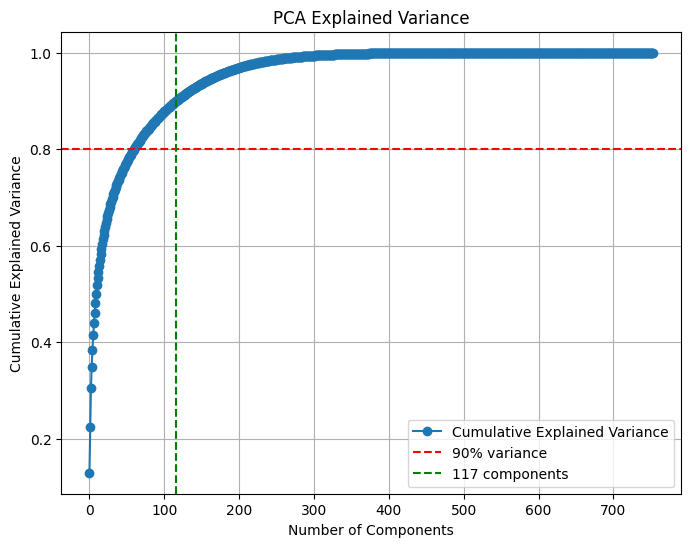

Cumulative Variance: [0.12990036 0.22376233 0.30619741 0.34881315 0.38455445 0.41453978
 0.4394946  0.46162402 0.48195921 0.50017946 0.51783666 0.53277977
 0.54584763 0.55857838 0.57116369 0.58283609 0.59352354 0.60410466
 0.61358257 0.62292864 0.63161068 0.6396878  0.64731316 0.65469783
 0.66138794 0.66766447 0.6739004  0.68002485 0.68581756 0.69142203
 0.69666843 0.70181425 0.706799   0.71162202 0.71628785 0.72085082
 0.72526382 0.72942707 0.73340686 0.73719978 0.74097352 0.74466811
 0.74829536 0.75180375 0.75525479 0.75866214 0.76198557 0.76512424
 0.76824692 0.77131386 0.77428187 0.77723697 0.78015632 0.78298903
 0.7857694  0.78853269 0.79121435 0.79386491 0.79645685 0.7990205
 0.8015166  0.80399228 0.80643752 0.80882219 0.81115603 0.81348185
 0.81575399 0.81798986 0.82021726 0.82243118 0.82463112 0.82676454
 0.82886356 0.83095666 0.83300916 0.83503438 0.83700197 0.83893782
 0.84086264 0.84277104 0.84466253 0.84652146 0.84835713 0.85018003
 0.8519974  0.8537964  0.85556036 0.857305

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Split the data into features and target variable
X = data.drop(['id'], axis=1)
y = data['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio per Component:\n", pca.explained_variance_ratio_)

# Calculate the cumulative sum of the explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of principal components that explain at least 90% of the total variance
n_components = np.where(cumulative_var_ratio >= 0.90)[0][0] + 1

# Select the first n_components principal components from the transformed data
X_pca_selected = X_pca[:, :n_components]

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_var_ratio, marker='o', label="Cumulative Explained Variance")
plt.axhline(y=0.80, color='r', linestyle='--', label='90% variance')  # Adjust this line to 90% if needed
plt.axvline(x=n_components-1, color='g', linestyle='--', label=f'{n_components} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Cumulative variance
print("Cumulative Variance:", cumulative_var_ratio)
print('Number of Components (90% variance) = ', n_components)
print('Original Data Shape = ', data.shape)


**Number of Components (90% variance) = 117**: This means that, after performing PCA, you need 117 principal components to explain at least 90% of the variance in the original data.

**Original Data Shape = (755, 755)**: This means your original dataset has 755 samples (rows) and 755 features (columns).


**Interpretation:**

PCA reduces the dimensionality of the data by transforming the original features into new "principal components," which are linear combinations of the original features. These components are ordered by the amount of variance they explain, with the first few components capturing most of the variance in the data.

**What to do next:**

1.   **Dimensionality Reduction:** Use the first 118 principal components as input for your machine learning models instead of all 755 features. These components will encapsulate most of the information from the original features.
2.   **Trade-off:** By reducing the number of components, you may slightly lose some variance (i.e., information), but in exchange, you gain a more efficient model.

**If 118 components seem like a lot**, you can choose a **lower threshold of explained variance, such as 80% or 85%,** depending on the specific trade-off you're willing to make between complexity and variance retention.

##PCA: Find Top 10 Contributing Features for each component:

In [23]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only the numerical features for PCA
numerical_features = data.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Fit PCA
pca = PCA(n_components=118)  # Set number of components to 118 (the ones explaining 90% variance)
pca.fit(data_scaled)

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame to hold the loadings for each component
loadings_df = pd.DataFrame(pca_components.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(118)])

# Find the top contributing features for each principal component
top_contributing_features = {}

# For each principal component, find the top features based on absolute loadings
for i in range(118):
    component = f'PC{i+1}'
    top_features = loadings_df[component].abs().sort_values(ascending=False).head(10)  # Get top 10 features for each component
    top_contributing_features[component] = top_features.index.tolist()

# Display the top contributing features for each component
for pc, features in top_contributing_features.items():
    print(f"Top features contributing to {pc}: {features}")


Top features contributing to PC1: ['app_LT_entropy_shannon_6_coef', 'app_LT_entropy_shannon_5_coef', 'app_LT_TKEO_mean_10_coef', 'app_LT_TKEO_std_10_coef', 'app_LT_entropy_shannon_7_coef', 'app_LT_TKEO_std_9_coef', 'app_LT_TKEO_mean_9_coef', 'app_LT_TKEO_mean_8_coef', 'app_LT_entropy_shannon_10_coef', 'app_LT_entropy_shannon_8_coef']
Top features contributing to PC2: ['tqwt_entropy_log_dec_26', 'tqwt_entropy_log_dec_25', 'tqwt_maxValue_dec_19', 'tqwt_minValue_dec_19', 'tqwt_maxValue_dec_8', 'app_TKEO_std_4_coef', 'tqwt_minValue_dec_8', 'app_det_TKEO_mean_3_coef', 'minIntensity', 'tqwt_minValue_dec_9']
Top features contributing to PC3: ['det_LT_TKEO_std_3_coef', 'det_LT_TKEO_std_2_coef', 'det_LT_TKEO_mean_2_coef', 'Ed_6_coef', 'det_TKEO_std_3_coef', 'Ed2_2_coef', 'Ea', 'det_TKEO_mean_6_coef', 'det_LT_TKEO_std_4_coef', 'Ed2_3_coef']
Top features contributing to PC4: ['tqwt_entropy_log_dec_36', 'tqwt_TKEO_std_dec_2', 'tqwt_TKEO_mean_dec_8', 'tqwt_maxValue_dec_31', 'tqwt_entropy_shannon_de

**Identify the most important features contributing to the first 117 principal components:**


1.   **PCA Loadings (Components Weights):** PCA generates "loadings" that show how much each original feature contributes to each principal component. These loadings are coefficients that map original features to the new principal components.
2.   **Identify the Top Features Based on Loadings:** For each of the 117 principal components, you can rank the original features by their absolute loading values. Features with higher absolute values of loadings contribute more to the component.

##PCA Find Unique Features Across All Principal Components:

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame called 'data'
# Select only the numerical features for PCA
numerical_features = data.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Fit PCA
pca = PCA(n_components=118)  # Set number of components to 118 (the ones explaining 90% variance)
pca.fit(data_scaled)

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame to hold the loadings for each component
loadings_df = pd.DataFrame(pca_components.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(118)])

# Find the top contributing features for each principal component
distinct_features = set()  # Use a set to keep track of distinct features

# For each principal component, find the top features based on absolute loadings
for i in range(118):
    component = f'PC{i+1}'
    top_features = loadings_df[component].abs().sort_values(ascending=False).head(10).index.tolist()  # Get top 10 features for each component
    distinct_features.update(top_features)  # Add features to the set

# Convert the set of distinct features to a list for easier manipulation
distinct_features = list(distinct_features)

# Print distinct features
print(f"Total number of distinct features: {len(distinct_features)}")
print("Distinct features contributing to the PCs:")
for feature in distinct_features:
    print(feature)


Total number of distinct features: 389
Distinct features contributing to the PCs:
mean_MFCC_11th_coef
tqwt_TKEO_mean_dec_19
mean_12th_delta_delta
tqwt_entropy_shannon_dec_3
locPctJitter
tqwt_TKEO_mean_dec_1
IMF_SNR_entropy
app_LT_TKEO_std_9_coef
tqwt_energy_dec_8
tqwt_TKEO_mean_dec_26
tqwt_entropy_shannon_dec_11
Ed2_10_coef
tqwt_TKEO_mean_dec_36
tqwt_energy_dec_19
tqwt_TKEO_std_dec_20
tqwt_medianValue_dec_12
f4
tqwt_skewnessValue_dec_5
tqwt_medianValue_dec_10
det_TKEO_mean_6_coef
det_LT_TKEO_std_7_coef
tqwt_stdValue_dec_3
tqwt_medianValue_dec_11
det_LT_entropy_log_9_coef
GNE_NSR_SEO
tqwt_medianValue_dec_22
mean_11th_delta_delta
tqwt_stdValue_dec_21
tqwt_skewnessValue_dec_8
det_LT_entropy_shannon_6_coef
tqwt_TKEO_std_dec_26
tqwt_medianValue_dec_35
tqwt_medianValue_dec_32
tqwt_kurtosisValue_dec_34
tqwt_entropy_shannon_dec_2
tqwt_skewnessValue_dec_12
app_det_TKEO_mean_3_coef
tqwt_minValue_dec_22
tqwt_meanValue_dec_31
mean_MFCC_6th_coef
std_4th_delta
tqwt_meanValue_dec_22
tqwt_meanValue_de

**Total number of distinct features from 117 components: 389**

To identify distinct features contributing to each principal component (PC).


1.   Get distinct features across all principal components.
2.   Avoid duplication: Ensure features contributing to multiple PCs are only listed once.





##Principal Component Analysis (PCA): Script 2 to ensure the number of components
Focuses more on displaying the cumulative variance and prints the number of components required for 90% variance.

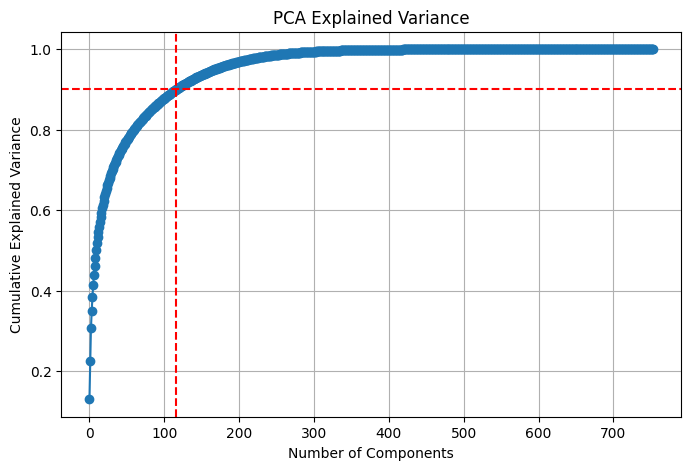

Number of components explaining at least 90% variance: 117
Component 1: Explained Variance Ratio = 0.1299, Cumulative Variance = 0.1299
Component 2: Explained Variance Ratio = 0.0939, Cumulative Variance = 0.2238
Component 3: Explained Variance Ratio = 0.0824, Cumulative Variance = 0.3062
Component 4: Explained Variance Ratio = 0.0426, Cumulative Variance = 0.3488
Component 5: Explained Variance Ratio = 0.0357, Cumulative Variance = 0.3846
Component 6: Explained Variance Ratio = 0.0300, Cumulative Variance = 0.4145
Component 7: Explained Variance Ratio = 0.0250, Cumulative Variance = 0.4395
Component 8: Explained Variance Ratio = 0.0221, Cumulative Variance = 0.4616
Component 9: Explained Variance Ratio = 0.0203, Cumulative Variance = 0.4820
Component 10: Explained Variance Ratio = 0.0182, Cumulative Variance = 0.5002
Component 11: Explained Variance Ratio = 0.0177, Cumulative Variance = 0.5178
Component 12: Explained Variance Ratio = 0.0149, Cumulative Variance = 0.5328
Component 13: 

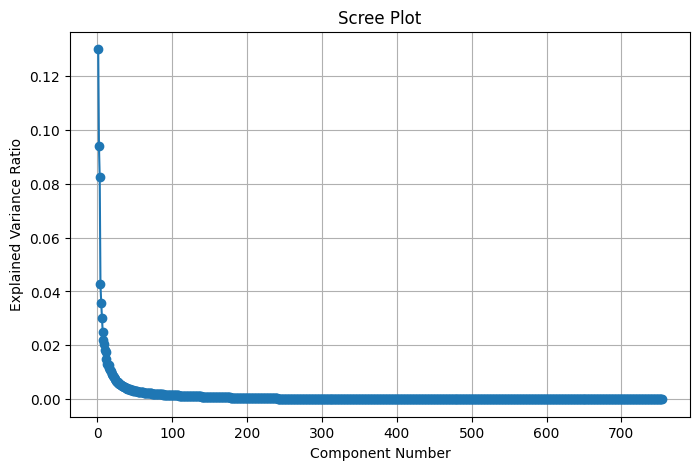

In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Selecting only numerical features for PCA
numerical_features = data.select_dtypes(include=[np.number])

# Drop the 'id' column
if 'id' in numerical_features.columns:
    numerical_features = numerical_features.drop('id', axis=1)


# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Initialize PCA with all components to understand variance
pca = PCA()  # Not setting n_components initially to capture all components

# Fit PCA on the scaled data
principal_components = pca.fit_transform(data_scaled)

# Calculate cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--')  # 90% variance line
plt.axvline(x=np.argmax(explained_variance >= 0.90), color='r', linestyle='--')  # Line at the component that crosses 90%
plt.grid(True)
plt.show()

# Print the number of components that explain at least 90% of the variance
n_components_90 = np.argmax(explained_variance >= 0.90) + 1  # +1 because index starts at 0
print(f"Number of components explaining at least 90% variance: {n_components_90}")

# Print explained variance ratios and cumulative sum
explained_variance_ratios = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance_ratios)

# Display explained variance ratios for each component
for i, (ratio, cumsum) in enumerate(zip(explained_variance_ratios, explained_variance_cumsum)):
    print(f"Component {i+1}: Explained Variance Ratio = {ratio:.4f}, Cumulative Variance = {cumsum:.4f}")

# Cross-check the 90% variance cutoff point
n_components_90 = np.argmax(explained_variance_cumsum >= 0.90) + 1
print(f"Number of components explaining at least 90% variance: {n_components_90}")

# Scree plot to visualize explained variance per component
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratios) + 1), explained_variance_ratios, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()



##Sensitivity Analysis (Random Forest Classifier)

Accuracy of the model: 0.8634361233480177
Feature ranking:
1. feature std_delta_delta_log_energy (0.017828152546628052)
2. feature std_delta_log_energy (0.014470575417656378)
3. feature std_7th_delta_delta (0.011752045568207132)
4. feature std_7th_delta (0.011437929030978797)
5. feature std_9th_delta_delta (0.010399219806753523)
6. feature std_6th_delta_delta (0.009886764751837779)
7. feature std_6th_delta (0.009729764910019428)
8. feature tqwt_TKEO_std_dec_12 (0.00912134486146735)
9. feature tqwt_maxValue_dec_12 (0.008070308132787921)
10. feature std_8th_delta_delta (0.008016493676408987)
11. feature tqwt_energy_dec_12 (0.007352837288879878)
12. feature tqwt_kurtosisValue_dec_36 (0.006817330209448279)
13. feature tqwt_minValue_dec_11 (0.006530406954073403)
14. feature tqwt_energy_dec_11 (0.006485508675553803)
15. feature tqwt_stdValue_dec_11 (0.006370336160070926)
16. feature tqwt_entropy_log_dec_35 (0.0059862890918998025)
17. feature std_8th_delta (0.005949488778181585)
18. feature t

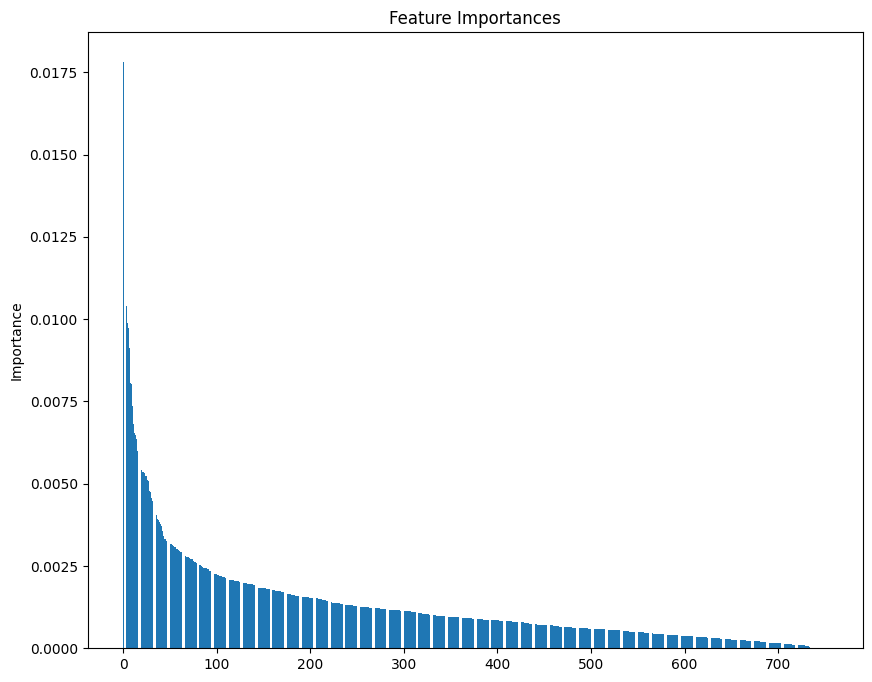

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Select features and target variable
X = data.drop(['class','id'], axis=1)
y = data['class']  # Update accordingly

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
# Remove feature name labels by commenting out or removing plt.xticks()
# plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.ylabel('Importance')
plt.show()

Perform a **Sensitivity Analysis using the Random Forest classifier** to assess the importance of each feature in your dataset. This method will help you understand which features have the most impact on the model's predictions:

**Accuracy of the model: 0.8634361233480177**

*   Feature Importance: This analysis will show which features contribute most to the model's predictions, helping prioritize which features affect outcomes the most.
*   Visualization: The plot at the end will help visually assess the importance of each feature.